<a href="https://colab.research.google.com/github/Harsh-58/DataScienceA2/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Including a polynomial element in a model helps capture more complex relationships between variables that a simple linear model might miss. Sometimes, real-world data has curves or fluctuations that a straight line can't represent well, and adding polynomial terms allows the model to fit the data more accurately. For example, if you're modeling house prices based on square footage, the relationship might not be strictly linear. Larger homes might have a diminishing price per square foot, and a polynomial model would do a better job of capturing that.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

Adding polynomial terms can make a model too complex, leading to overfitting, where the model captures noise instead of meaningful patterns. This makes it perform well on training data but poorly on new data. They would also be bad for linear data since the model could overcomplicate the simple linear relationship.


**Task3**:

What's the point of using b splines?

B-splines help break up data into smaller pieces, which allow for flexible curve fitting without the risk of overfitting. They're useful when dealing with data that has varying trends across different ranges. For example, it could be good for modeling temperature changes throughout the year, B-splines could adjust for seasonal patterns/changes without forcing the whole dataset into one equation.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A Gaussian Process is a super flexible way to predict values based on past data. It also gives an estimate of uncertainty. Instead of assuming a fixed shape for the data, it treats predictions as probabilities, meaning it can adjust more naturally to different trends. A GP kind of treats every x-value as a knot, meaning each data point has its own polynomial regression while also considering relationships with other points. GPs perform better with more data since they rely on patterns across points.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [3]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [1]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-0w2d9rpc
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-0w2d9rpc
  Resolved https://github.com/pydata/xarray.git to commit 0caf09628011f9790d6e8df62fe92c485c7382ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [7]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')

num_knots = 6
knots = np.linspace(howell.height.min(), howell.height.max(), num_knots+2)[1:-1]

#distributional model
formula_howell = bmb.Formula(
    "weight ~ bs(height, degree=3, knots=knots)",
    "sigma ~ height"
)
model_spline = bmb.Model(formula_howell, howell, family="gaussian")
idata_spline = model_spline.fit()

Output()

# **B Spline Model:**

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


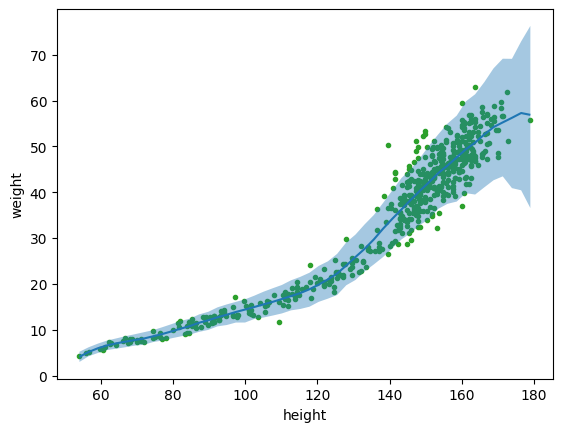

In [8]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

The article shows why choosing the right kernel is crucial with the changepoint model. Instead of using a basic smooth kernel like RBF, which is good for gradual changes, they use a changepoint kernel to capture the sharp shifts in CO₂ trends. This seems to makes a huge difference. Without it, the model would miss key turning points in the data. The correct kernel helps the GP adapt to real-world patterns instead of forcing everything into a single curve.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

The Changepoint Covariance Model is a GP that detects shifts in data trends by allowing different patterns before and after a changepoint. It is my favorite because it shows how GPs can adapt to real-world shifts in data rather than just smoothing everything out. It helps us detect meaningful changes in the data which allows us to recognize patterns.